In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Proyecto IA'
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **RECONOCIMIENTO DE EMOCIONES A PARTIR DE VIDEO-ENTREVISTAS**

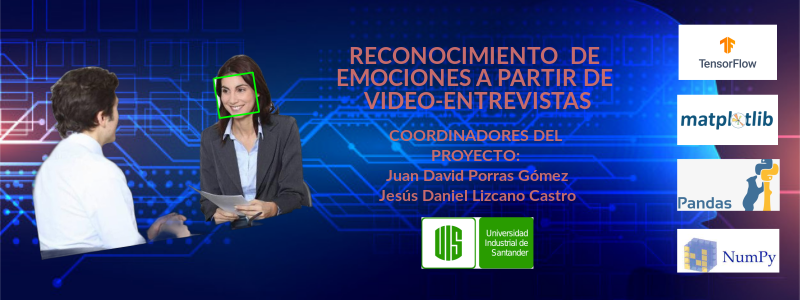

---



---



**Primero se cargan las librerias**

In [ ]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
#from imblearn.over_sampling import RandomOverSampler 

2.6.0


**Los siguiente es leer el archivo del dataset**

In [ ]:
data = pd.read_csv('train.csv')
print('Tamaño del dataset: ',data.shape)
print(data.dtypes)
data.head()

Tamaño del dataset:  (28709, 2)
emotion     int64
pixels     object
dtype: object


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


Se convierte a numpy para realizar el pre-procesamiento de datos con mayor  facilidad

In [ ]:
datanp = data.to_numpy()
print(datanp.dtype)

object


Los valores de los pixeles vienen como una cadena de caracteres por lo que se deben separar primero y convertirlos a valores numericos enteros.

In [ ]:
for i in range(len(datanp)):
  datanp[i][1] = np.array(datanp[i][1].split(),dtype=int).reshape((48,48)).tolist()

Se realiza una exploración al numero de datos por cada clase.

0 :  3995
1 :  436
2 :  4097
3 :  7215
4 :  4830
5 :  3171
6 :  4965


<BarContainer object of 7 artists>

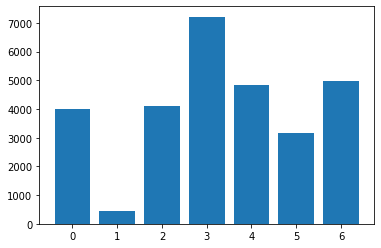

In [ ]:
unique, counts = np.unique(datanp[:,0], return_counts=True,)
for i in range(len(unique)):
  print(unique[i],": ",counts[i])

plt.bar(unique,counts)

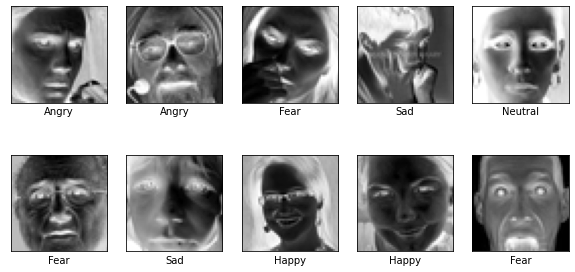

In [ ]:
class_names = ['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(datanp[i,1], cmap=plt.cm.binary)
    plt.xlabel(class_names[datanp[i,0]])

Vamos a balancear los grupos de imagenes para tener alrededor de una cantidad de 5000 para cada uno.

Eliminamos datos a la clase 3

In [ ]:
index = np.where(datanp[:,0] == 3)
index[0][5000:]

array([19977, 19979, 19981, ..., 28694, 28697, 28698])

In [ ]:
print("Shape antes de eliminar: ",datanp.shape)
index = np.where(datanp[:,0] == 3)
print(len(index[0]),len(index[0][5000:]))
datanp = np.delete(datanp,(index[0][5000:]),axis=0)
print("Shape despues de eliminar: ",datanp.shape)

Shape antes de eliminar:  (28709, 2)
7215 2215
Shape despues de eliminar:  (26494, 2)


Lo siguiente es un generador de imagenes con filtros predeterminados

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rotation_range=40,
     horizontal_flip=True,
     fill_mode='reflect'
)

Se genera una lista de imagenes nuevas para la clase 1

In [ ]:
def balancear(n):
  cant = datanp[datanp[:,0]==n].shape[0]
  print(f"Cantidad de datos para el grupo de {n}: ",cant)
  imagenes_generadas = []
  dt = datanp[datanp[:,0]==n]
  for i in range(5000 - cant):
    n = np.random.randint(cant)
    imgGenerada = datagen.flow(np.array(dt[n,1]).reshape(1,48,48,1), batch_size=1,).next().reshape(48,48)
    imagenes_generadas.append([dt[n,0],imgGenerada.astype(int).tolist()])

  imagenes_generadas = np.array(imagenes_generadas)

  class_names = ['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
  plt.figure(figsize=(10,5))
  for i in range(10):
      plt.subplot(2,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(imagenes_generadas[i,1], cmap=plt.cm.binary)
      plt.xlabel(class_names[imagenes_generadas[i,0]])

  return imagenes_generadas

(26494, 2)
Cantidad de datos para el grupo de 1:  436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


(31058, 2)

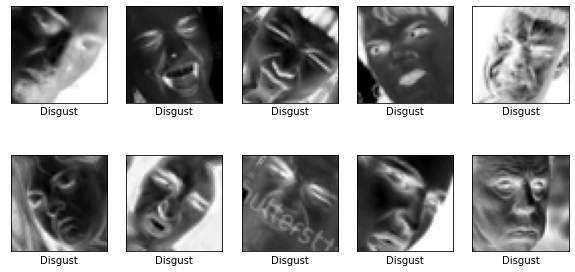

In [ ]:
print(datanp.shape)
datanp = np.concatenate((datanp,balancear(1)))
datanp.shape

(31058, 2)
Cantidad de datos para el grupo de 2:  4097


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


(31961, 2)

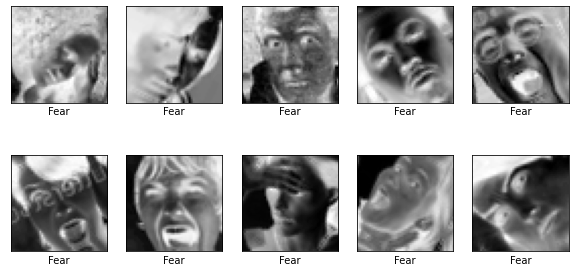

In [ ]:
print(datanp.shape)
datanp = np.concatenate((datanp,balancear(2)))
datanp.shape

(31961, 2)
Cantidad de datos para el grupo de 0:  3995


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


(32966, 2)

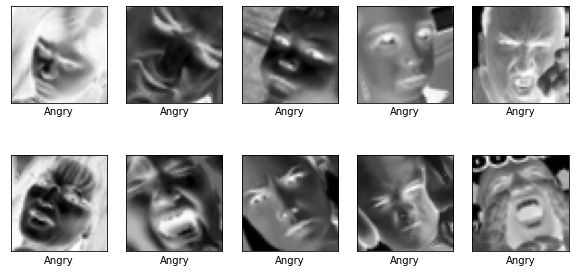

In [ ]:
print(datanp.shape)
datanp = np.concatenate((datanp,balancear(0)))
datanp.shape

(32966, 2)
Cantidad de datos para el grupo de 5:  3171


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


(34795, 2)

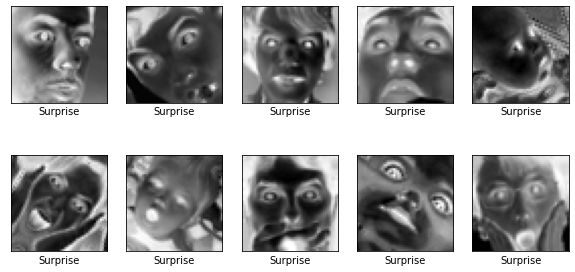

In [ ]:
print(datanp.shape)
datanp = np.concatenate((datanp,balancear(5)))
datanp.shape

0 :  5000
1 :  5000
2 :  5000
3 :  5000
4 :  4830
5 :  5000
6 :  4965


<BarContainer object of 7 artists>

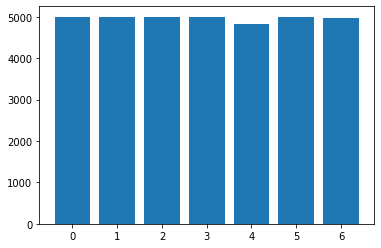

In [ ]:
unique, counts = np.unique(datanp[:,0], return_counts=True,)
for i in range(len(unique)):
  print(unique[i],": ",counts[i])

plt.bar(unique,counts)

Ahora el dataset esta mas balanceado que antes

In [ ]:
y = datanp[:,0].astype('float32')
print(y)

[0. 0. 2. ... 5. 5. 5.]


In [ ]:
x = []
for i in datanp[:,1]:
    x.append(i)

In [ ]:
x = np.array(x)

In [ ]:
x.shape

(34795, 48, 48)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3,shuffle=True)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(24356, 48, 48) (24356,)
(10439, 48, 48) (10439,)


In [ ]:
x_train = x_train.reshape([-1, 48, 48, 1])
x_test = x_test.reshape([-1, 48, 48, 1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
x_train.shape

(24356, 48, 48, 1)

Red Neuranal basica

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[48, 48, 1]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 303,946
Trainable params: 303,946
Non-trainable params: 0
_________________________________________________________________


Entrenamiento de Red neuronal basica

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
762/762 [==============================] - 3s 3ms/step - loss: 1.9308 - accuracy: 0.2003
Epoch 2/20
762/762 [==============================] - 3s 3ms/step - loss: 1.8598 - accuracy: 0.2573
Epoch 3/20
762/762 [==============================] - 3s 3ms/step - loss: 1.8228 - accuracy: 0.2828
Epoch 4/20
762/762 [==============================] - 3s 3ms/step - loss: 1.7971 - accuracy: 0.2931
Epoch 5/20
762/762 [==============================] - 3s 3ms/step - loss: 1.7770 - accuracy: 0.3072
Epoch 6/20
762/762 [==============================] - 3s 3ms/step - loss: 1.7604 - accuracy: 0.3162
Epoch 7/20
762/762 [==============================] - 3s 4ms/step - loss: 1.7450 - accuracy: 0.3234
Epoch 8/20
762/762 [==============================] - 3s 4ms/step - loss: 1.7329 - accuracy: 0.3278
Epoch 9/20
762/762 [==============================] - 3s 4ms/step - loss: 1.7143 - accuracy: 0.3370
Epoch 10/20
762/762 [==============================] - 3s 3ms/step - loss: 1.7034 - accuracy: 0.3437

Accuracy obtenido por la red nueronal basica

In [ ]:
#@title **code** Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

327/327 [==============================] - 1s 3ms/step - loss: 1.7387 - accuracy: 0.3279
Test accuracy: 0.32790496945381165


Aplicacion de una red convolucional

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(48,48,1), activation='relu'), #1 - blanco y negro
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #1 - blanco y negro
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(.2, input_shape=(2,)),
  tf.keras.layers.Dense(60, activation=tf.nn.relu),
  tf.keras.layers.Dense(7, activation=tf.nn.softmax) #Para redes de clasificacion
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dense_18 (Dense)             (None, 100)              

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Entrenamiento de una red neuronal convolucional

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
2436/2436 [==============================] - 17s 7ms/step - loss: 1.8140 - accuracy: 0.2642
Epoch 2/10
2436/2436 [==============================] - 16s 6ms/step - loss: 1.5450 - accuracy: 0.4098
Epoch 3/10
2436/2436 [==============================] - 16s 6ms/step - loss: 1.3778 - accuracy: 0.4773
Epoch 4/10
2436/2436 [==============================] - 16s 7ms/step - loss: 1.2444 - accuracy: 0.5312
Epoch 5/10
2436/2436 [==============================] - 16s 7ms/step - loss: 1.1154 - accuracy: 0.5836
Epoch 6/10
2436/2436 [==============================] - 16s 6ms/step - loss: 0.9970 - accuracy: 0.6275
Epoch 7/10
2436/2436 [==============================] - 16s 6ms/step - loss: 0.8859 - accuracy: 0.6686
Epoch 8/10
2436/2436 [==============================] - 16s 6ms/step - loss: 0.7754 - accuracy: 0.7129
Epoch 9/10
2436/2436 [==============================] - 16s 6ms/step - loss: 0.6839 - accuracy: 0.7480
Epoch 10/10
2436/2436 [==============================] - 15s 6ms/step - l

Accuracy obtenido en el proceso de testing con una red convolucional

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

327/327 [==============================] - 2s 5ms/step - loss: 1.9206 - accuracy: 0.4958
Test accuracy: 0.4958329200744629
Test loss: 1.9206135272979736


Se realiza una prueba con diferentes metodos de clasificación:

In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

**Primero con Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
est = GaussianNB()

est.fit(x_train.reshape(-1,2304),y_train)
predictions = est.predict(x_test.reshape(-1,2304))

In [ ]:
print("accuracy: ","%.3f"%accuracy_score(predictions, y_test))
print("tpr: ",tpr(est,x_test.reshape(-1,2304),y_test))
print("tnr: ",tnr(est,x_test.reshape(-1,2304),y_test))

accuracy:  0.232
tpr:  0.1655759162303665
tnr:  0.07503410641200546


**Segundo con DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

est = DecisionTreeClassifier(max_depth=2)
est.fit(x_train.reshape(-1,2304),y_train)
predictions = est.predict(x_test.reshape(-1,2304))

In [ ]:
print("accuracy: ","%.3f"%accuracy_score(predictions, y_test))
print("tpr: ",tpr(est,x_test.reshape(-1,2304),y_test))
print("tnr: ",tnr(est,x_test.reshape(-1,2304),y_test))

accuracy:  0.201
tpr:  0.0
tnr:  0.0


**Tercero con RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier()

est.fit(x_train.reshape(-1,2304),y_train)
predictions = est.predict(x_test.reshape(-1,2304))

In [ ]:
print("accuracy: ","%.3f"%accuracy_score(predictions, y_test))
print("tpr: ",tpr(est,x_test.reshape(-1,2304),y_test))
print("tnr: ",tnr(est,x_test.reshape(-1,2304),y_test))

accuracy:  0.457
tpr:  0.8147905759162304
tnr:  0.3321964529331514


  Ahora se implementa un codigo de OpenCV para la lectura de frames y detección de rostros en cada imagen

In [ ]:
import cv2
import os
import imutils
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

if not os.path.exists('Rostros detectados'):
	print('Carpeta creada: ','Rostros detectados')
	os.makedirs('Rostros detectados')

#cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
cap = cv2.VideoCapture('videoprueba.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
count = 0
imagenes_frames = []
while True:

  ret, frame = cap.read()
  if ret == False: break
  frame =  imutils.resize(frame, width=640)
  #frame = cv2.resize(frame,(300,200))
  #frame = cv2.rotate(frame, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = frame.copy()

  faces = faceClassif.detectMultiScale(gray,1.3,5)

  for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(48,48),interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('Rostros detectados' + '/rotro_{}.jpg'.format(count),rostro)
    count = count + 1
    imagenes_frames.append(rostro[:,:,1])
  cv2_imshow(frame)

  k =  cv2.waitKey(1)
  if k == 27 or count >= 300:
    break

cap.release()
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imagenes_frames = np.array(imagenes_frames)
imagenes_frames.shape

In [ ]:
imagenes_frames = imagenes_frames.reshape([-1, 48, 48, 1])

imagenes_frames = imagenes_frames.astype('float32')

imagenes_frames /= 255
imagenes_frames.shape

In [ ]:
predicciones=[]
predicciones = model.predict(imagenes_frames)

In [ ]:
valores = []
for i in predicciones:
  valores.append(np.argmax(i))

In [ ]:
class_names = ['Angry','Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
unique, counts = np.unique(valores, return_counts=True,)
for i in range(len(unique)):
  print(unique[i],". ",class_names[unique[i]],": ",counts[i])

plt.bar(unique,counts)